In [1]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares


In [2]:
#Gets the difference in position in terms of distance
def getDiffFromShrimp(shrimpPos, auvPos):
    diff = [[0,0],[0,0],[0,0],[0,0]]

    for i in range(len(auvPos)):
        diff[i] = [shrimpPos[0] - auvPos[i][0],shrimpPos[1] - auvPos[i][1]];
        
    return diff


In [3]:
#gets magnitude of position difference between each auvposition, and shrimp, in terms of distance
def posdiffMagnitude(diff, error=0):
    mag = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    k = 0
    for i in range(4):
        for j in range(i+1, 4):
            mag[k] = (np.linalg.norm(diff[i])-np.linalg.norm(diff[j]))
            mag[k] = mag[k] + error;

            k = k+1
    return mag


In [4]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
pivotAuv = [20, 20];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
shrimpPos=[65,65]

posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff)

print(posidiff)

posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff, error=1)

print(posidiff)


[18.362684616102193, 18.362684616102193, 56.568542494923804, 0.0, 38.205857878821611, 38.205857878821611]
[19.362684616102193, 19.362684616102193, 57.568542494923804, 1.0, 39.205857878821611, 39.205857878821611]


In [5]:
def loss(s):
    error = np.zeros(6)
    k = 0
    diff = getDiffFromShrimp(s, auvPos)
    for i in range(4):
        for j in range(i+1,4):
            #print(i,j)
            error[k] = posidiff[k]-(np.linalg.norm(diff[i])-np.linalg.norm(diff[j]))
            k = k+1
    return error

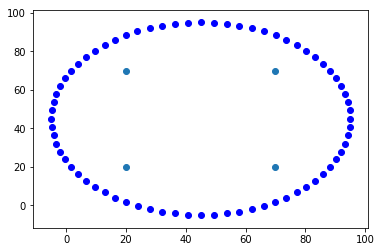

In [53]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
pivotAuv = [20, 20];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
initial = [100, 100];
xsum = 0;
ysum = 0;
for i in range(4):
    xsum = auvPos[i][0] + xsum;
    ysum = auvPos[i][1] + ysum;

center = [0,0];
center[0] = xsum /4;
center[1] = ysum/ 4;

x,y = zip(*auvPos)


ang_range = np.arange(0,2*np.pi,2*np.pi/72);
#We have AUV positions..Now we evaluate accuracy based on distance
shrimp_orig = [center[0], center[1]];
plt.scatter(x,y);
for i in ang_range:
    shrimpPos = [shrimp_orig[0]+50*np.cos(i), shrimp_orig[1]+50*np.sin(i)];
    posidiff = getDiffFromShrimp(shrimpPos, auvPos)
    posidiff = posdiffMagnitude(posidiff, error=1e-2)
    res = least_squares(loss, initial)
    #plt.plot([initial[0],res.x[0]], [initial[1],res.x[1]])
    #plt.plot([initial[0],shrimpPos[0]], [initial[1],shrimpPos[1]])

    plt.scatter(res.x[0], res.x[1], color='b')
plt.show();



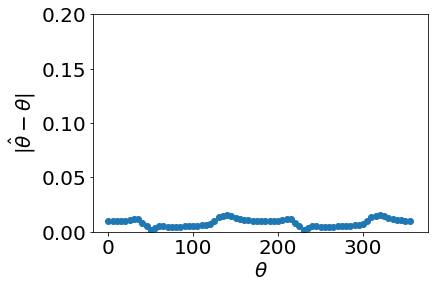

In [163]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
pivotAuv = [20, 20];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
initial = [100, 100];
xsum = 0;
ysum = 0;
for i in range(4):
    xsum = auvPos[i][0] + xsum;
    ysum = auvPos[i][1] + ysum;

center = [0,0];
center[0] = xsum /4;
center[1] = ysum/ 4;

x,y = zip(*auvPos)


ang_range = np.arange(0,2*np.pi,2*np.pi/72);
#We have AUV positions..Now we evaluate accuracy based on distance
shrimp_orig = [center[0], center[1]];
#plt.scatter(x,y);
for i in ang_range:
    shrimpPos = [shrimp_orig[0]+50*np.cos(i), shrimp_orig[1]+50*np.sin(i)];
    posidiff = getDiffFromShrimp(shrimpPos, auvPos)
    posidiff = posdiffMagnitude(posidiff, error=1e-2)
    res = least_squares(loss, initial)
    #plt.plot([initial[0],res.x[0]], [initial[1],res.x[1]])
    #plt.plot([initial[0],shrimpPos[0]], [initial[1],shrimpPos[1]])
    result_angle = np.arctan2(res.x[1]-shrimp_orig[1], res.x[0]-shrimp_orig[0]) - np.arctan2(shrimpPos[1]-shrimp_orig[1], shrimpPos[0]-shrimp_orig[0]);
    plt.scatter(i * 360/(2*np.pi), abs(result_angle * 360/(2*np.pi)), color='C0')
    #plt.scatter(res.x[0], res.x[1], color='b')

plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.xlabel(r'$ \theta $');
plt.ylabel(r'$| \hat \theta - \theta |$')
plt.ylim(0,0.2);
plt.show();


In [154]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
pivotAuv = [20, 20];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
initial = [100, 100];
xsum = 0;
ysum = 0;
for i in range(4):
    xsum = auvPos[i][0] + xsum;
    ysum = auvPos[i][1] + ysum;

center = [0,0];
center[0] = xsum /4;
center[1] = ysum/ 4;

x,y = zip(*auvPos)
direct_range = np.arange(0, 1000, 10);
ang_range = np.arange(0,2*np.pi,2*np.pi/72);
#We have AUV positions..Now we evaluate accuracy based on distance
shrimp_orig = [center[0], center[1]];
#plt.scatter(x,y);
xvals = []
yvals = []
for j in direct_range:
    result_diff = 0;
    for i in ang_range:
        shrimpPos = [shrimp_orig[0]+j*np.cos(i), shrimp_orig[1]+j*np.sin(i)];
        posidiff = getDiffFromShrimp(shrimpPos, auvPos)
        posidiff = posdiffMagnitude(posidiff, error=1e-2)
        res = least_squares(loss, initial)
        #plt.plot([initial[0],res.x[0]], [initial[1],res.x[1]])
        #plt.plot([initial[0],shrimpPos[0]], [initial[1],shrimpPos[1]])
        result_diff = result_diff + np.linalg.norm(shrimpPos-res.x);
        #plt.scatter(res.x[0], res.x[1], color='b')    
    result_diff = result_diff/72.0;
    xvals.append(j)
    yvals.append(abs(result_diff))


In [ ]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
pivotAuv = [20, 20];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
initial = [100, 100];
xsum = 0;
ysum = 0;
for i in range(4):
    xsum = auvPos[i][0] + xsum;
    ysum = auvPos[i][1] + ysum;

center = [0,0];
center[0] = xsum /4;
center[1] = ysum/ 4;

x,y = zip(*auvPos)
direct_range = np.arange(0, 1000, 10);
ang_range = np.arange(0,2*np.pi,2*np.pi/72);
#We have AUV positions..Now we evaluate accuracy based on distance
shrimp_orig = [center[0], center[1]];
#plt.scatter(x,y);
xvals = []
yvals = []
for j in direct_range:
    result_diff = 0;
    for i in ang_range:
        shrimpPos = [shrimp_orig[0]+j*np.cos(i), shrimp_orig[1]+j*np.sin(i)];
        posidiff = getDiffFromShrimp(shrimpPos, auvPos)
        posidiff = posdiffMagnitude(posidiff, error=1e-2)
        res = least_squares(loss, initial)
        #plt.plot([initial[0],res.x[0]], [initial[1],res.x[1]])
        #plt.plot([initial[0],shrimpPos[0]], [initial[1],shrimpPos[1]])
        result_diff = result_diff + np.linalg.norm(shrimpPos-res.x);
        #plt.scatter(res.x[0], res.x[1], color='b')    
    result_diff = result_diff/72.0;
    xvals.append(j)
    yvals.append(abs(result_diff))

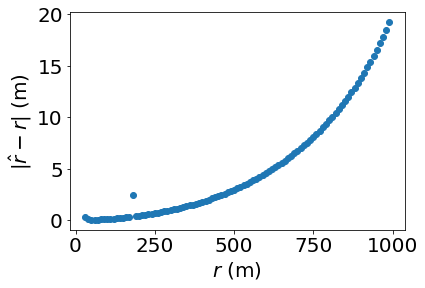

In [164]:
plt.scatter(xvals[3:], yvals[3:]);
plt.xlabel("$r$ (m)");
plt.ylabel("$| \hat r - r |$ (m)");
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

plt.show();

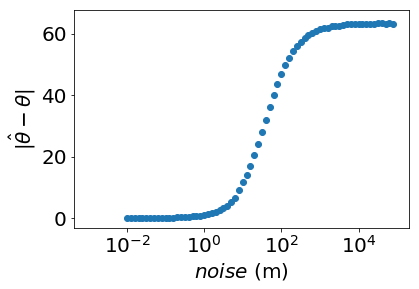

In [150]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
pivotAuv = [20, 20];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
initial = [100, 100];
xsum = 0;
ysum = 0;
for i in range(4):
    xsum = auvPos[i][0] + xsum;
    ysum = auvPos[i][1] + ysum;

center = [0,0];
center[0] = xsum /4;
center[1] = ysum/ 4;

x,y = zip(*auvPos)


ang_range = np.arange(0,2*np.pi,2*np.pi/72);
#We have AUV positions..Now we evaluate accuracy based on distance
shrimp_orig = [center[0], center[1]];
#plt.scatter(x,y);
for i in np.arange(-2,5,0.1):
    shrimpPos = [shrimp_orig[0]+50*np.cos(0), shrimp_orig[1]+50*np.sin(0)];
    posidiff = getDiffFromShrimp(shrimpPos, auvPos)
    posidiff = posdiffMagnitude(posidiff, error=10**i)
    res = least_squares(loss, initial)
    #plt.plot([initial[0],res.x[0]], [initial[1],res.x[1]])
    #plt.plot([initial[0],shrimpPos[0]], [initial[1],shrimpPos[1]])
    result_angle = np.arctan2(res.x[1]-shrimp_orig[1], res.x[0]-shrimp_orig[0]) - np.arctan2(shrimpPos[1]-shrimp_orig[1], shrimpPos[0]-shrimp_orig[0]);
    plt.scatter(10**i, abs(result_angle * 360/(2*np.pi)), color='C0')
    #plt.scatter(res.x[0], res.x[1], color='b')

plt.xscale('log')
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

plt.xlabel(r'$ noise$ (m)');
plt.ylabel(r'$| \hat \theta - \theta |$')
plt.show();


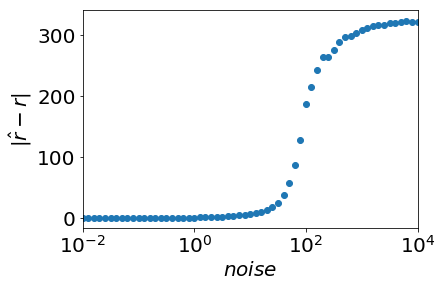

[120.0, 120.0]


In [152]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
pivotAuv = [20, 20];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
initial = [100, 100];
xsum = 0;
ysum = 0;
for i in range(4):
    xsum = auvPos[i][0] + xsum;
    ysum = auvPos[i][1] + ysum;

center = [0,0];
center[0] = xsum /4;
center[1] = ysum/ 4;

x,y = zip(*auvPos)
auvPos = [[0,0],[0,0],[0,0],[0,0]]
pivotAuv = [20, 20];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
initial = [100, 100];
xsum = 0;
ysum = 0;
for i in range(4):
    xsum = auvPos[i][0] + xsum;
    ysum = auvPos[i][1] + ysum;

center = [0,0];
center[0] = xsum /4;
center[1] = ysum/ 4;

x,y = zip(*auvPos)
direct_range = np.arange(0, 1000, 10);
ang_range = np.arange(0,2*np.pi,2*np.pi/72);
#We have AUV positions..Now we evaluate accuracy based on distance
shrimp_orig = [center[0], center[1]];
#plt.scatter(x,y);
xvals = []
yvals = []
for j in np.arange(-2,5,0.1):
    result_diff = 0;
    shrimpPos = [shrimp_orig[0]+75, shrimp_orig[1]+75];
    posidiff = getDiffFromShrimp(shrimpPos, auvPos)
    posidiff = posdiffMagnitude(posidiff, error=10**j)
    res = least_squares(loss, initial)
    #plt.plot([initial[0],res.x[0]], [initial[1],res.x[1]])
    #plt.plot([initial[0],shrimpPos[0]], [initial[1],shrimpPos[1]])
    result_diff = result_diff + np.linalg.norm(shrimpPos-res.x);
    #plt.scatter(res.x[0], res.x[1], color='b')    
    #result_diff = result_diff/72.0;
    xvals.append(10**j)
    yvals.append(abs(result_diff))

plt.scatter(xvals, yvals);
plt.xscale('log')
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.xlim(10**(-2),10**4)
plt.xlabel(r'$ noise $');
plt.ylabel(r'$| \hat r - r |$')
plt.show();

print(shrimpPos)

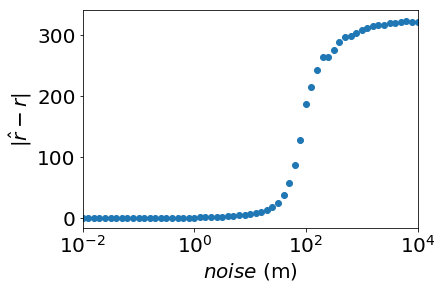

In [153]:
plt.scatter(xvals, yvals);
plt.xscale('log')
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.xlim(10**(-2),10**4)
plt.xlabel(r'$ noise$ (m)');
plt.ylabel(r'$| \hat r - r |$')
plt.show();


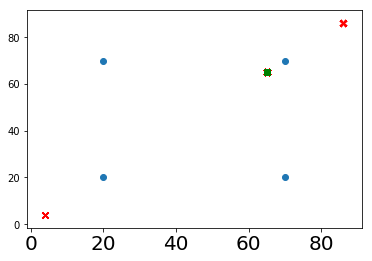

In [107]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]

ppivotAuv = [20, 20];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
shrimpPos=[65,65]

posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff)

for i in range(-100, 100, 10):
    for j in range(-100, 100, 10):
        initial = [i,j]
        res = least_squares(loss, initial)
        #plt.plot([initial[0],res.x[0]], [initial[1], res.x[1]],c='r')

        plt.scatter(res.x[0], res.x[1], marker = 'x', c='r');

x,y = zip(*auvPos)
plt.scatter(x,y);

#plt.scatter(res.x[0], res.x[1], marker = 'x', c='r');
plt.scatter(shrimpPos[0], shrimpPos[1], marker = 's', c='g');
plt.show();



In [7]:
print(res.x)
print(np.arctan(res.x[1]/res.x[0]) - np.arctan(shrimpPos[1]/shrimpPos[0]))

[ 86.03564707  86.03564707]
0.0


In [8]:
a = np.random.randn();
a

-1.4550237474777201

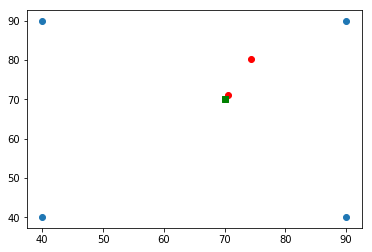

In [9]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
pivotAuv = [40, 40];
auvPos[0] = pivotAuv;
auvPos[1] = [pivotAuv[0]+50, pivotAuv[1]];
auvPos[2] = [pivotAuv[0], pivotAuv[1]+50];
auvPos[3] = [pivotAuv[0]+50, pivotAuv[1]+50];
shrimpPos=[70,70]
initial=[40, 40]
errors = []
for i in range(-1, 20, 1):
    error = 10**(-1*i)*np.random.randn();
    posidiff = getDiffFromShrimp(shrimpPos, auvPos)
    posidiff = posdiffMagnitude(posidiff, error=error)
    res = least_squares(loss, initial)
    errors.append([error, res.x])
    plt.scatter(res.x[0], res.x[1], marker = 'o', c='r');
    #print(10**(-1*i))
                  
x,y = zip(*auvPos)
plt.scatter(x,y);
plt.scatter(shrimpPos[0], shrimpPos[1], marker = 's', c='g');

plt.show();

print()

In [10]:
np.random.randn()

-0.8745156854984313

In [12]:
auvr = 50; #auvrange
sr = 50; #squarerange
shr = 400; #shrimprange
errors = []
errorangle = []
for i in range(30):
    pivotAuv = [50*np.random.randn(), auvr*np.random.randn()]
    auvPos[0] = pivotAuv;
    auvPos[1] = [pivotAuv[0]+sr, pivotAuv[1]];
    auvPos[2] = [pivotAuv[0], pivotAuv[1]+sr];
    auvPos[3] = [pivotAuv[0]+sr, pivotAuv[1]+sr];
    
    shrimpPos=[400*np.random.randn(),400*np.random.randn()]
    initial=auvPos[3]
    posidiff = getDiffFromShrimp(shrimpPos, auvPos)
    posidiff = posdiffMagnitude(posidiff, error=10**(-1*i)*np.random.randn())
    res = least_squares(loss, initial)
    errors.append((0, np.linalg.norm(res.x-shrimpPos)))
    errorangle.append((0, abs(np.arctan(res.x[1]/res.x[0]) - np.arctan(shrimpPos[1]/shrimpPos[0]))))
    
    for i in range(-1, 4, 1):
        posidiff = getDiffFromShrimp(shrimpPos, auvPos)
        posidiff = posdiffMagnitude(posidiff, error=10**(-1*i)*np.random.randn())
        res = least_squares(loss, initial)
        errors.append((10**(-1*i), np.linalg.norm(res.x-shrimpPos)))
        errorangle.append((10**(-1*i), abs(np.arctan(res.x[1]/res.x[0]) - np.arctan(shrimpPos[1]/shrimpPos[0]))))

        #plt.scatter(res.x[0], res.x[1], marker = 'o', c='r');
        #print(10**(-1*i))
                  


In [ ]:
10**(-1*1)*np.random.randn()

In [ ]:
x,y = zip(*errors)
xa, ya = zip(*errorangle)
plt.scatter(x,y)
plt.yscale('log')
plt.xscale('log')
plt.xlim([10e-6,10e2])
plt.ylim([1, 10e2])
plt.xlabel('measurement inaccuracy (m)')
plt.ylabel('distance error (m)')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 
plt.rc('axes', labelsize=20)     # fontsize of the axes title
plt.show();


plt.scatter(xa,ya)
plt.xscale('log')
plt.xlim([10e-6,10e2])
plt.ylim([0, 0.5])
plt.xlabel('measurement inaccuracy (m)')
plt.ylabel('angle error (rad)')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('axes', labelsize=20) 
plt.show();


In [ ]:
errorangle

In [ ]:
print(res.x)
print(np.arctan(res.x[1]/res.x[0]) - np.arctan(shrimpPos[1]/shrimpPos[0]))

In [ ]:
posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff, error=1e-3)
posidiff

In [ ]:
posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff, error=0)
posidiff

In [ ]:
posidiff

In [ ]:
auvPos[0] = [-91, 731]
auvPos[1] = [-96, 687]
auvPos[2] = [-12, 675]
auvPos[3] = [-43, 723];
shrimpPos=[-58, 688]
initial=[-120, -80]
posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff, error=0)
res = least_squares(loss, initial)

In [ ]:
ires.x

In [ ]:
posidiff = getDiffFromShrimp(shrimpPos, auvPos)
posidiff = posdiffMagnitude(posidiff, error=0)

In [ ]:
posidiff